In [23]:
import pandas as pd
import glob 
import matplotlib.pyplot as plt
import numpy as np
  
raw_data_path = '../data/raw'
file_list = glob.glob(raw_data_path + "/*.csv") 

In [24]:
file_list

['../data/raw\\1__0_36__12_5_2024.csv',
 '../data/raw\\2__0_45__12_5_2024.csv',
 '../data/raw\\3__0_53__12_5_2024.csv']

In [25]:
main_dataframe = pd.read_csv(file_list[0], delimiter=',')
for i in range(1, len(file_list)): 
    data = pd.read_csv(file_list[i], delimiter=';') 
    df = pd.DataFrame(data) 
    main_dataframe = pd.concat([main_dataframe, df], axis=0) 

In [27]:
# main_dataframe['url_id'] = main_dataframe['url'].map(lambda x: x.split('/')[-2])
main_dataframe['url_id'] = main_dataframe['url'].apply(lambda x: x.split('/')[-2] if isinstance(x, str) else np.nan)
new_dataframe = main_dataframe[['url_id', 'total_meters', 'price']].set_index('url_id')

<Axes: >

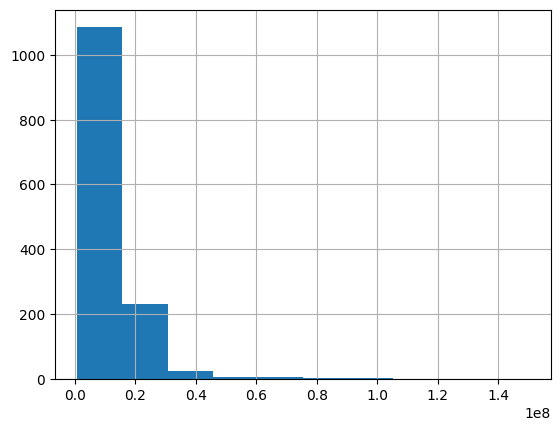

In [28]:
new_dataframe['price'].hist()

In [29]:
new_df = new_dataframe[new_dataframe['price'] < 100_000_000]

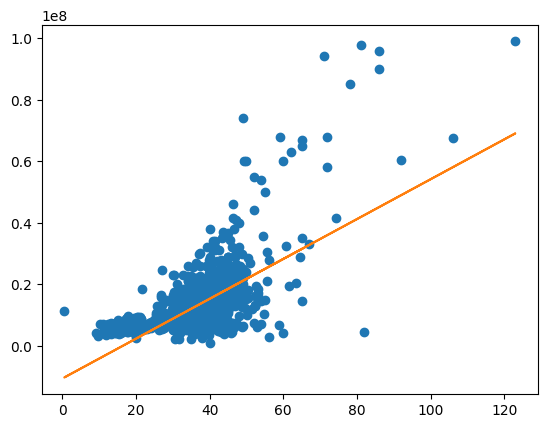

In [30]:
x = new_df['total_meters']
y = new_df['price']

plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)